## PART1 Android Usage

We would like to determine if the usage patterns for android users differ between different devices.   
For example, do users using Samsung devices use more call minutes than those using LG devices?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
user_dev = pd.read_csv('/content/drive/MyDrive/DA/user_device.csv')
print(f"user_device: {user_dev.shape}")
user_use = pd.read_csv('/content/drive/MyDrive/DA/user_usage.csv')
print(f"user_usage: {user_use.shape}")
android_dev = pd.read_csv('/content/drive/MyDrive/DA/android_devices.csv')
print(f"android_devices: {android_dev.shape}")

user_device: (272, 6)
user_usage: (240, 4)
android_devices: (14546, 4)


In [ ]:
print(f"user_device:\n {user_dev.head()}")

user_device:
    use_id  user_id platform  platform_version     device  use_type_id
0   22782    26980      ios              10.2  iPhone7,2            2
1   22783    29628  android               6.0    Nexus 5            3
2   22784    28473  android               5.1   SM-G903F            1
3   22785    15200      ios              10.2  iPhone7,2            3
4   22786    28239  android               6.0  ONE E1003            1


In [ ]:
print(f"user_usage:\n {user_use.head()}")

user_usage:
    outgoing_mins_per_month  outgoing_sms_per_month  monthly_mb  use_id
0                    21.97                    4.82     1557.33   22787
1                  1710.08                  136.88     7267.55   22788
2                  1710.08                  136.88     7267.55   22789
3                    94.46                   35.17      519.12   22790
4                    71.59                   79.26     1557.33   22792


In [ ]:
print(f"android_devices:\n {android_dev.head()}")

android_devices:
   Retail Branding Marketing Name    Device                      Model
0             NaN            NaN    AD681H  Smartfren Andromax AD681H
1             NaN            NaN     FJL21                      FJL21
2             NaN            NaN       T31              Panasonic T31
3             NaN            NaN  hws7721g         MediaPad 7 Youth 2
4              3Q        OC1020A   OC1020A                    OC1020A


### TO DO  

you must “connect” the information in :   
— *user_usage* and *user_device* to identify the phone that each user is using ;

I specified `inner` as the merge type to indicate that we take the users displayed only in the two dataframes `user_usage` and `user_device`

In [ ]:
use_dev = pd.merge(user_dev, user_use, how="inner", on="use_id")
use_dev.head()

,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
0,22787,12921,android,4.3,GT-I9505,1,21.97,4.82,1557.33
1,22788,28714,android,6.0,SM-G930F,1,1710.08,136.88,7267.55
2,22789,28714,android,6.0,SM-G930F,1,1710.08,136.88,7267.55
3,22790,29592,android,5.1,D2303,1,94.46,35.17,519.12
4,22792,28217,android,5.1,SM-G361F,1,71.59,79.26,1557.33


In [ ]:
use_dev.shape

(159, 9)

In [ ]:
use_dev_android = use_dev[use_dev['platform']=='android']
print(f"Le résultat pour seulement les clients qui prennent la plateforme android : \n {use_dev_android.shape}")

Le résultat pour seulement les clients qui prennent la plateforme android : 
 (157, 9)


— *user_device* and *android_device* to identify the manufacturer of a phone.

In [ ]:
use_dev_manu = pd.merge(use_dev_android, android_dev, how='left', left_on='device', right_on='Model')
use_dev_manu.head()

,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,Retail Branding,Marketing Name,Device,Model
0,22787,12921,android,4.3,GT-I9505,1,21.97,4.82,1557.33,Samsung,Galaxy S4,jflte,GT-I9505
1,22788,28714,android,6.0,SM-G930F,1,1710.08,136.88,7267.55,Samsung,Galaxy S7,herolte,SM-G930F
2,22789,28714,android,6.0,SM-G930F,1,1710.08,136.88,7267.55,Samsung,Galaxy S7,herolte,SM-G930F
3,22790,29592,android,5.1,D2303,1,94.46,35.17,519.12,Sony,Xperia M2,D2303,D2303
4,22792,28217,android,5.1,SM-G361F,1,71.59,79.26,1557.33,Samsung,Galaxy Core Prime,coreprimevelte,SM-G361F


In [ ]:
use_dev_manu.shape

(209, 13)

— for the 4 most commons device manufacturers

In [ ]:
most_manu = use_dev_manu["Retail Branding"].value_counts()[:4]
most_manu

Samsung     108
HTC          44
Sony         16
Motorola     16
Name: Retail Branding, dtype: int64

— plotting

> `pd.isin(values)` which checks whether each retail branding item that would be presented in the`["Samsung", "HTC", "Sony", "Motorola"]`

In [ ]:
info = use_dev_manu[use_dev_manu["Retail Branding"].isin(["Samsung", "HTC", "Sony", "Motorola"])]
info.shape

(184, 13)

In [ ]:
info.head()

,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,Retail Branding,Marketing Name,Device,Model
0,22787,12921,android,4.3,GT-I9505,1,21.97,4.82,1557.33,Samsung,Galaxy S4,jflte,GT-I9505
1,22788,28714,android,6.0,SM-G930F,1,1710.08,136.88,7267.55,Samsung,Galaxy S7,herolte,SM-G930F
2,22789,28714,android,6.0,SM-G930F,1,1710.08,136.88,7267.55,Samsung,Galaxy S7,herolte,SM-G930F
3,22790,29592,android,5.1,D2303,1,94.46,35.17,519.12,Sony,Xperia M2,D2303,D2303
4,22792,28217,android,5.1,SM-G361F,1,71.59,79.26,1557.33,Samsung,Galaxy Core Prime,coreprimevelte,SM-G361F


In [ ]:
to_plot = pd.melt(info, id_vars=["Retail Branding"], value_vars=["outgoing_mins_per_month", "outgoing_sms_per_month"])
to_plot.head()

,Retail Branding,variable,value
0,Samsung,outgoing_mins_per_month,21.97
1,Samsung,outgoing_mins_per_month,1710.08
2,Samsung,outgoing_mins_per_month,1710.08
3,Sony,outgoing_mins_per_month,94.46
4,Samsung,outgoing_mins_per_month,71.59


> `pd.melt()` is useful for keeping all brands as column and transforming mins and sms expenses as variables.

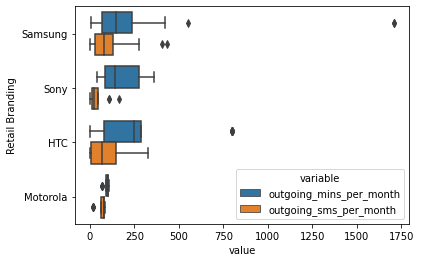

In [ ]:
sns.boxplot(data=to_plot, x="value", y="Retail Branding", hue="variable")

## PART2 Identifiying Gender Bias in NMT predictions

The corpus is represented by a DataFrame with the following columns :   
— *tokenized_fra*, *tokenized_eng* the source sentence and its reference translation (tokenized by SentencePiece);   
— *proba_his_tm*, *proba_her_tm* the probability that a MT system generates “his” or “her” when translating the source sentence ;  
— *proba_his_lm*, *proba_her_lm* the probability that a MT system generates “his” or “her”
when it has no access to the source sentence.

In [ ]:
corpus = pd.read_csv("/content/drive/MyDrive/DA/corpus.csv")
corpus.head()

,tokenized_fra,tokenized_eng,proba_his_tm,proba_her_tm,proba_his_lm,proba_her_lm
0,▁l ' abat teur ▁a ▁terminé ▁son ▁travail .,▁the ▁slaughter er ▁has ▁finished ▁his ▁work .,0.464239,0.046879,0.135776,0.010176
1,▁l ' abat t euse ▁a ▁terminé ▁son ▁travail .,▁the ▁slaughter er ▁has ▁finished ▁her ▁work .,0.461334,0.056800,0.135776,0.010176
2,▁l ' abbé ▁a ▁terminé ▁son ▁travail .,▁the ▁abbot ▁has ▁finished ▁his ▁work .,0.884117,0.010301,0.221838,0.025174
3,▁l ' a bb esse ▁a ▁terminé ▁son ▁travail .,▁the ▁a bb ess ▁has ▁finished ▁her ▁work .,0.273272,0.098643,0.038563,0.014677
4,▁l ' aca dé mic ien ▁a ▁terminé ▁son ▁travail .,▁the ▁academic ian ▁has ▁finished ▁his ▁work .,0.632505,0.066412,0.217720,0.005785


### Question 1

In [ ]:
# How many sentences are there in the corpus?
corpus.shape[0]

3398

### Question 2  
For each sentence add a column containing the following information :

In [ ]:
# — the English job name
corpus["eng_job"] = corpus["tokenized_eng"].str.split(r"▁the ▁|▁has ▁*").str[1].str.strip()
corpus["eng_job"]

0         slaughter er
1         slaughter er
2                abbot
3             a bb ess
4         academic ian
             ...      
3393    z y th ologist
3394               boy
3395              girl
3396               man
3397             woman
Name: eng_job, Length: 3398, dtype: object

In [ ]:
# — the English pronoun
corpus["eng_pronoun"] = corpus["tokenized_eng"].str.split(r"▁").str[-2].str.strip()
corpus["eng_pronoun"]

0       his
1       her
2       his
3       her
4       his
       ... 
3393    her
3394    his
3395    her
3396    his
3397    her
Name: eng_pronoun, Length: 3398, dtype: object

In [ ]:
# — the French job name
corpus["fra_job"] = corpus["tokenized_fra"].str.split(r"▁|▁a ▁*|'").str[2].str.strip()
corpus["fra_job"]

0            abat teur
1          abat t euse
2                 abbé
3            a bb esse
4       aca dé mic ien
             ...      
3393      z yth ologue
3394            garçon
3395             fille
3396             homme
3397             femme
Name: fra_job, Length: 3398, dtype: object

In [ ]:
# — the French determiner
corpus["fra_det"] = corpus["tokenized_fra"].str.split(r"▁|'").str[1].str.strip()
corpus["fra_det"]

0        l
1        l
2        l
3        l
4        l
        ..
3393    la
3394    le
3395    la
3396     l
3397    la
Name: fra_det, Length: 3398, dtype: object

In [ ]:
# — the number of tokens in the French job name
corpus["job_tk_fr"] = corpus["fra_job"].str.split().str.len()
corpus["job_tk_fr"]

0       2
1       3
2       1
3       3
4       4
       ..
3393    3
3394    1
3395    1
3396    1
3397    1
Name: job_tk_fr, Length: 3398, dtype: int64

In [ ]:
# — the number of tokens in the English job name
corpus["job_tk_en"] = corpus["eng_job"].str.split().str.len()
corpus["job_tk_en"]

0       2
1       2
2       1
3       3
4       2
       ..
3393    4
3394    1
3395    1
3396    1
3397    1
Name: job_tk_en, Length: 3398, dtype: int64

In [ ]:
corpus[["tokenized_fra", "tokenized_eng", "fra_job", "fra_det", "eng_job", "eng_pronoun", "job_tk_fr", "job_tk_en"]]

,tokenized_fra,tokenized_eng,fra_job,fra_det,eng_job,eng_pronoun,job_tk_fr,job_tk_en
0,▁l ' abat teur ▁a ▁terminé ▁son ▁travail .,▁the ▁slaughter er ▁has ▁finished ▁his ▁work .,abat teur,l,slaughter er,his,2,2
1,▁l ' abat t euse ▁a ▁terminé ▁son ▁travail .,▁the ▁slaughter er ▁has ▁finished ▁her ▁work .,abat t euse,l,slaughter er,her,3,2
2,▁l ' abbé ▁a ▁terminé ▁son ▁travail .,▁the ▁abbot ▁has ▁finished ▁his ▁work .,abbé,l,abbot,his,1,1
3,▁l ' a bb esse ▁a ▁terminé ▁son ▁travail .,▁the ▁a bb ess ▁has ▁finished ▁her ▁work .,a bb esse,l,a bb ess,her,3,3
4,▁l ' aca dé mic ien ▁a ▁terminé ▁son ▁travail .,▁the ▁academic ian ▁has ▁finished ▁his ▁work .,aca dé mic ien,l,academic ian,his,4,2
...,...,...,...,...,...,...,...,...
3393,▁la ▁z yth ologue ▁a ▁terminé ▁son ▁travail .,▁the ▁z y th ologist ▁has ▁finished ▁her ▁work .,z yth ologue,la,z y th ologist,her,3,4
3394,▁le ▁garçon ▁a ▁fini ▁son ▁travail .,▁the ▁boy ▁has ▁finished ▁his ▁work .,garçon,le,boy,his,1,1
3395,▁la ▁fille ▁a ▁fini ▁son ▁travail .,▁the ▁girl ▁has ▁finished ▁her ▁work .,fille,la,girl,her,1,1
3396,▁l ' homme ▁a ▁fini ▁son ▁travail .,▁the ▁man ▁has ▁finished ▁his ▁work .,homme,l,man,his,1,1


### Question 3  
Add a column indicating whether the French occupational noun is epicene or not ; do the same for the English occupational noun.   
What is the proportion of epicene noun in English? in French?

**<font color=#00BFFF>Note</font>**  

`DataFrame.duplicated(subset=None, keep='first')`   
Returns Boolean series indicating duplicate lines. By setting keep to False, all duplicate elements are True.

In [ ]:
corpus["fra_epicene"] = corpus["fra_job"].duplicated(keep=False)
corpus["eng_epicene"] = corpus["eng_job"].duplicated(keep=False)

In [ ]:
corpus[["fra_job", "fra_epicene", "eng_job", "eng_epicene"]]

,fra_job,fra_epicene,eng_job,eng_epicene
0,abat teur,False,slaughter er,True
1,abat t euse,False,slaughter er,True
2,abbé,False,abbot,False
3,a bb esse,False,a bb ess,False
4,aca dé mic ien,False,academic ian,True
...,...,...,...,...
3393,z yth ologue,True,z y th ologist,True
3394,garçon,True,boy,False
3395,fille,False,girl,False
3396,homme,False,man,False


In [ ]:
epicene_fra = corpus["fra_epicene"].value_counts(normalize=True).to_dict()
print("Proportion of epicene nouns in French : {:.2%}".format(epicene_fra[True]))

Proportion of epicene nouns in French : 32.55%


In [ ]:
epicene_eng = corpus["eng_epicene"].value_counts(normalize=True).to_dict()
print("Proportion of epicene nouns in English : {:.2%}".format(epicene_eng[True]))

Proportion of epicene nouns in English : 95.20%


### Question 4  
Compute the accuracy of the MT system, i.e. the proportion of sentences in which the English possessive pronoun is correctly predicted (i.e. p(her) > p(his for a feminine occupational noun)

**<font color=#00BFFF>Note</font>**  
DataFrame.idxmax(axis=0, skipna=True, numeric_only=False) to compare the values of `proba_his_tm` and `proba_her_tm` and return the index of the maximum value.

In [ ]:
# Compare the probabilities of the two columns to find the index of the maximum value
corpus["pred_tm"] = corpus[["proba_his_tm", "proba_her_tm"]].idxmax(axis=1)

In [ ]:
# Extraction of gender pronouns
corpus["pred_tm"] = corpus["pred_tm"].str.split("_").str[1]

In [ ]:
accuracy_tm = corpus['pred_tm'].eq(corpus['eng_pronoun']).sum() / len(corpus)
print('The accuracy of TM system : {:.2%}'.format(accuracy_tm))

The accuracy of TM system : 69.04%


In [ ]:
corpus["pred_lm"] = corpus[["proba_his_lm", "proba_her_lm"]].idxmax(axis=1)
corpus["pred_lm"]  = corpus["pred_lm"].str.split("_").str[1]

In [ ]:
accuracy_lm = corpus["pred_lm"].eq(corpus["eng_pronoun"]).sum() / len(corpus)
print('The accuracy of LM system : {:.2%}'.format(accuracy_lm))

The accuracy of LM system : 51.21%


Gender can be marked in French in four different ways (by the determiner only, the noun only, the determiner and the noun or it can not be marked.

### Question 5  
List 5 random examples for each possible way to express gender in French.

In [ ]:
# Determiner only

det_only = corpus[(corpus['fra_epicene']) & (corpus['fra_det'] != "l")]
det_only.sample(5)

,tokenized_fra,tokenized_eng,proba_his_tm,proba_her_tm,proba_his_lm,proba_her_lm,eng_job,eng_pronoun,fra_job,fra_det,job_tk_fr,job_tk_en,fra_epicene,eng_epicene,pred_tm,pred_lm
1506,▁le ▁gem m ologue ▁a ▁terminé ▁son ▁travail .,▁the ▁gem m ologist ▁has ▁finished ▁his ▁work .,0.772477,0.013025,0.260967,0.013271,gem m ologist,his,gem m ologue,le,3,3,True,True,his,his
1817,▁la ▁kayak iste ▁a ▁terminé ▁son ▁travail .,▁the ▁kayak er ▁has ▁finished ▁her ▁work .,0.420029,0.160482,0.067639,0.008779,kayak er,her,kayak iste,la,2,2,True,True,his,his
3394,▁le ▁garçon ▁a ▁fini ▁son ▁travail .,▁the ▁boy ▁has ▁finished ▁his ▁work .,0.748713,0.020850,0.111514,0.050345,boy,his,garçon,le,1,1,True,False,his,his
1083,▁la ▁disc - jo c key ▁a ▁terminé ▁son ▁travail .,▁the ▁disc ▁jockey ▁has ▁finished ▁her ▁work .,0.378013,0.040822,0.024312,0.005140,disc ▁jockey,her,disc - jo c key,la,5,2,True,True,his,his
1390,▁le ▁fi ch iste ▁a ▁terminé ▁son ▁travail .,▁the ▁file ▁keep er ▁has ▁finished ▁his ▁work .,0.711503,0.010379,0.087557,0.003950,file ▁keep er,his,fi ch iste,le,3,3,True,True,his,his


In [ ]:
# Noun only

noun_only = corpus[(corpus['fra_epicene']==False) & (corpus['fra_det'] == "l")]
noun_only.sample(5)

,tokenized_fra,tokenized_eng,proba_his_tm,proba_her_tm,proba_his_lm,proba_her_lm,eng_job,eng_pronoun,fra_job,fra_det,job_tk_fr,job_tk_en,fra_epicene,eng_epicene,pred_tm,pred_lm
66,▁l ' agent ▁a ▁terminé ▁son ▁travail .,▁the ▁officer ▁has ▁finished ▁his ▁work .,0.673676,0.047579,0.189192,0.011586,officer,his,agent,l,1,1,False,True,his,his
1290,▁l ' es qui sseur ▁a ▁terminé ▁son ▁travail .,▁the ▁sketch er ▁has ▁finished ▁his ▁work .,0.540579,0.065499,0.032057,0.014761,sketch er,his,es qui sseur,l,3,2,False,True,his,his
27,▁l ' ac qué reuse ▁a ▁terminé ▁son ▁travail .,▁the ▁buyer ▁has ▁finished ▁her ▁work .,0.502121,0.052266,0.085017,0.000388,buyer,her,ac qué reuse,l,3,1,False,True,his,his
1734,▁l ' inspecteur ▁a ▁terminé ▁son ▁travail .,▁the ▁inspector ▁has ▁finished ▁his ▁work .,0.668345,0.023499,0.222380,0.014660,inspector,his,inspecteur,l,1,1,False,True,his,his
1181,▁l ' égout ière ▁a ▁terminé ▁son ▁travail .,▁the ▁sewer ▁worker ▁has ▁finished ▁her ▁work .,0.094032,0.043475,0.064093,0.002792,sewer ▁worker,her,égout ière,l,2,2,False,True,his,his


In [ ]:
# Determiner and noun

det_and_noun = corpus[(corpus['fra_epicene']==False) & (corpus['fra_det'] != "l")]
det_and_noun.sample(5)

,tokenized_fra,tokenized_eng,proba_his_tm,proba_her_tm,proba_his_lm,proba_her_lm,eng_job,eng_pronoun,fra_job,fra_det,job_tk_fr,job_tk_en,fra_epicene,eng_epicene,pred_tm,pred_lm
1134,▁le ▁du c ▁a ▁terminé ▁son ▁travail .,▁the ▁duke ▁has ▁finished ▁his ▁work .,0.717214,0.020016,0.098012,0.011346,duke,his,du c,le,2,1,False,False,his,his
1035,▁la ▁détache use ▁a ▁terminé ▁son ▁travail .,▁the ▁stain ▁remove r ▁has ▁finished ▁her ▁work .,0.135425,0.106736,0.000471,0.000492,stain ▁remove r,her,détache use,la,2,3,False,True,his,her
1070,▁le ▁diffuseur ▁a ▁terminé ▁son ▁travail .,▁the ▁broadcaster ▁has ▁finished ▁his ▁work .,0.201072,0.056331,0.015483,0.003959,broadcaster,his,diffuseur,le,1,1,False,True,his,his
3329,▁la ▁vigneron ne ▁a ▁terminé ▁son ▁travail .,▁the ▁wine maker ▁has ▁finished ▁her ▁work .,0.263475,0.276781,0.283786,0.007010,wine maker,her,vigneron ne,la,2,2,False,True,her,his
551,▁la ▁certificat rice ▁a ▁terminé ▁son ▁travail .,▁the ▁certifying ▁officer ▁has ▁finished ▁her ...,0.252970,0.331929,0.096918,0.005919,certifying ▁officer,her,certificat rice,la,2,2,False,True,her,his


In [ ]:
# Not be marked

not_marked = corpus[(corpus['fra_epicene']==True) & (corpus['fra_det'] == "l")]
not_marked.sample(5)

,tokenized_fra,tokenized_eng,proba_his_tm,proba_her_tm,proba_his_lm,proba_her_lm,eng_job,eng_pronoun,fra_job,fra_det,job_tk_fr,job_tk_en,fra_epicene,eng_epicene,pred_tm,pred_lm
1136,▁l ' ébéniste ▁a ▁terminé ▁son ▁travail .,▁the ▁cabinet - maker ▁has ▁finished ▁his ▁work .,0.619778,0.007364,0.072499,0.006010,cabinet - maker,his,ébéniste,l,1,3,True,True,his,his
1295,▁l ' essa y iste ▁a ▁terminé ▁son ▁travail .,▁the ▁essay ist ▁has ▁finished ▁her ▁work .,0.493261,0.239437,0.183447,0.029183,essay ist,her,essa y iste,l,3,2,True,True,his,his
1314,▁l ' éth ologue ▁a ▁terminé ▁son ▁travail .,▁the ▁eth ologist ▁has ▁finished ▁his ▁work .,0.698498,0.042673,0.313248,0.012578,eth ologist,his,éth ologue,l,2,2,True,True,his,his
82,▁l ' aide ▁a ▁terminé ▁son ▁travail .,▁the ▁help ▁has ▁finished ▁his ▁work .,0.007204,0.008186,0.000537,0.000729,help,his,aide,l,1,1,True,True,her,her
1673,▁l ' hum or iste ▁a ▁terminé ▁son ▁travail .,▁the ▁humor ist ▁has ▁finished ▁her ▁work .,0.715079,0.039858,0.386378,0.045528,humor ist,her,hum or iste,l,3,2,True,True,his,his


### Question 6  
Build one DataFrame that contains, for each possible way to express gender, **the number of corresponding sentences**, **the accuracy**, **the mean and standard deviation** of the four probabilities considered (e.g. : the DataFrame should contain a row that indicates the number French sentences in which gender is not marked, the accuracy achieved by the NMT system when translating these sentences and 8 values to describe the probabilities)

In [ ]:
def compute(data):
  # the number of corresponding sentences
  nb_sentences = data.shape[0]

  # the accuracy
  accuracy_tm = (data['pred_tm'] == data['eng_pronoun']).sum() / len(data)
  accuracy_lm = (data['pred_lm'] == data['eng_pronoun']).sum() / len(data)

  # the mean and standard deviation of the four probabilities
  stats = data[['proba_his_tm', 'proba_her_tm', 'proba_his_lm', 'proba_her_lm']].agg(['mean', 'std'])

  his_tm_mean = stats.loc['mean','proba_his_tm']
  her_tm_mean = stats.loc['mean', 'proba_her_tm']
  his_tm_std = stats.loc['std', 'proba_his_tm']
  her_tm_std = stats.loc['std', 'proba_her_tm']

  his_lm_mean = stats.loc['mean','proba_his_lm']
  her_lm_mean = stats.loc['mean', 'proba_her_lm']
  his_lm_std = stats.loc['std', 'proba_his_lm']
  her_lm_std = stats.loc['std', 'proba_her_lm']

  return nb_sentences, accuracy_tm, accuracy_lm, his_tm_mean, her_tm_mean, his_tm_std, her_tm_std, his_lm_mean, her_lm_mean, his_lm_std, her_lm_std

In [ ]:
df = {'determiner_only': compute(det_only),
      'noun_only': compute(noun_only),
      'det_noun': compute(det_and_noun),
      'not_marked': compute(not_marked)}

express_gender = pd.DataFrame(df, index=['nb_sentences',
                                           'accuracy_tm',
                                           'accuracy_lm',
                                           'his_tm_mean',
                                           'her_tm_mean',
                                           'his_tm_std',
                                           'her_tm_std',
                                           'his_lm_mean',
                                           'her_lm_mean',
                                           'his_lm_std',
                                           'her_lm_std'])

In [ ]:
express_gender = express_gender.transpose()
express_gender['nb_sentences'] = express_gender['nb_sentences'].astype(int)
express_gender

,nb_sentences,accuracy_tm,accuracy_lm,his_tm_mean,her_tm_mean,his_tm_std,her_tm_std,his_lm_mean,her_lm_mean,his_lm_std,her_lm_std
determiner_only,834,0.693046,0.503597,0.433031,0.126115,0.243111,0.155297,0.157196,0.021855,0.100414,0.023691
noun_only,503,0.532803,0.514911,0.484387,0.074257,0.191173,0.094391,0.107341,0.016166,0.080997,0.030368
det_noun,1789,0.761878,0.516490,0.380134,0.142980,0.242960,0.178194,0.100884,0.019437,0.074651,0.037713
not_marked,272,0.503676,0.503676,0.589022,0.054622,0.172900,0.058624,0.183914,0.021298,0.096701,0.027202


### Question 7  
Compute the accuracy for LM and TM for feminine and masculine sentences.

In [ ]:
# feminine sentences TM & LM
fem = corpus[corpus['eng_pronoun'] == 'her']
accuracy_tm_fm = (fem['pred_tm'] == 'her').sum() / len(fem)
accuracy_lm_fm = (fem['pred_lm'] == 'her').sum() / len(fem)

# masculine sentences TM & LM
mas = corpus[corpus['eng_pronoun'] == 'his']
accuracy_tm_ms = (mas['pred_tm'] == 'his').sum() / len(mas)
accuracy_lm_ms = (mas['pred_lm'] == 'his').sum() / len(mas)

print('The accuracy of TM system for feminine sentences: {:.2%}'.format(accuracy_tm_fm))
print('The accuracy of LM system for feminine sentences: {:.2%}'.format(accuracy_lm_fm))
print('The accuracy of TM system for masculine sentences: {:.2%}'.format(accuracy_tm_ms))
print('The accuracy of LM system for masculine sentences: {:.2%}'.format(accuracy_lm_ms))

The accuracy of TM system for feminine sentences: 38.43%
The accuracy of LM system for feminine sentences: 7.36%
The accuracy of TM system for masculine sentences: 99.65%
The accuracy of LM system for masculine sentences: 95.06%


### Question 8  
Compute the accuracy depending on the number of subtokens the occupational noun is broken into as well as the number of observations for each number of subtokens.

In [ ]:
accuracy_subtokens = pd.DataFrame()

In [ ]:
def accuracy(df):
  return ((df['pred_tm'] == df['eng_pronoun']).sum() / len(df)).round(2)

In [ ]:
tm_subtokens_accuracy = corpus.groupby('job_tk_fr').apply(accuracy)

In [ ]:
accuracy_subtokens['accuracy_tm'] = tm_subtokens_accuracy

In [ ]:
accuracy_subtokens['nb_observations'] = corpus.value_counts('job_tk_fr')

In [ ]:
accuracy_subtokens

,accuracy_tm,nb_observations
job_tk_fr,,
1,0.84,596
2,0.71,1168
3,0.63,1088
4,0.59,445
5,0.58,90
6,0.86,7
7,0.50,4


We will now assess the capacity of subword tokenization to identify gender-specific subtokens :

### Question 9  
From the data, determine if female occupational nouns are segmented into more units than male ones. Interpret.

In [ ]:
corpus.groupby('eng_pronoun')['job_tk_fr'].mean()

eng_pronoun
her    2.642142
his    2.358446
Name: job_tk_fr, dtype: float64

The mean value shows that French occupational nouns have more subtokens in the case of females. Female nouns are segmented to more subtokens than male noun on average.



### Question 10  
Add a column to the DataFrame that contains the suffix of the subword tokenization of the occupational noun (i.e. the last token resulting from the subword tokenization if and
only if the noun is split into more than one token)

In [ ]:
import numpy as np
corpus['fr_suffix'] = corpus['fra_job'].apply(lambda x: x.split(' ')[-1] if len(x.split(' ')) > 1 else np.nan)

In [ ]:
corpus[['fra_job', 'fr_suffix']]

,fra_job,fr_suffix
0,abat teur,teur
1,abat t euse,euse
2,abbé,NaN
3,a bb esse,esse
4,aca dé mic ien,ien
...,...,...
3393,z yth ologue,ologue
3394,garçon,NaN
3395,fille,NaN
3396,homme,NaN


### Question 11  
Create a new DataFrame that contains the following information :   
  
— the 20 most frequent suffixes in the corpus ;   
— for each suffix, the number of time it appears in the corpus ;   
— for each suffix, the number of time it appears in a feminine (resp. masculine) occupa-
tional noun.

In [ ]:
# the 20 most frequent suffixes and their occurrence in the corpus
most_fq = corpus['fr_suffix'].value_counts().head(20).to_dict()
print(f"The 20 most frequent suffixes in the corpus: {most_fq}")

The 20 most frequent suffixes in the corpus: {'iste': 335, 'use': 211, 'euse': 200, 'eur': 163, 'ur': 163, 'ologue': 152, 'ière': 129, 'e': 128, 'atrice': 76, 'graphe': 62, 'ier': 60, 'ienne': 54, 'ologiste': 52, 'trice': 45, 'ateur': 44, 'liste': 36, 'niste': 34, 'rice': 32, 'ère': 28, 'ien': 28}


In [ ]:
# create a new dataframe
suffixes = pd.DataFrame.from_dict(most_fq, orient='index', columns=['occurrence'])
suffixes = suffixes.reset_index().rename(columns={'index':'suffixe'})
suffixes

,suffixe,occurrence
0,iste,335
1,use,211
2,euse,200
3,eur,163
4,ur,163
5,ologue,152
6,ière,129
7,e,128
8,atrice,76
9,graphe,62


In [ ]:
# the occurrence in feminine and masculine occupational nouns

def get_f_occurrence(sf):
  fem_occ = (corpus[(corpus['fr_suffix'] == sf)][corpus['eng_pronoun']=='her']).shape[0]
  return fem_occ

In [ ]:
def get_m_occurrence(sf):
  mas_occ = (corpus[(corpus['fr_suffix'] == sf)][corpus['eng_pronoun']=='his']).shape[0]
  return mas_occ

In [ ]:
suffixes['occurrence_f'] = suffixes['suffixe'].apply(get_f_occurrence)
suffixes['occurrence_m'] = suffixes['suffixe'].apply(get_m_occurrence)

In [ ]:
suffixes

,suffixe,occurrence,occurrence_f,occurrence_m
0,iste,335,167,168
1,use,211,211,0
2,euse,200,200,0
3,eur,163,1,162
4,ur,163,1,162
5,ologue,152,76,76
6,ière,129,129,0
7,e,128,110,18
8,atrice,76,76,0
9,graphe,62,31,31


### Question 12  
Plot these data with a bar plot. What can you conclude?

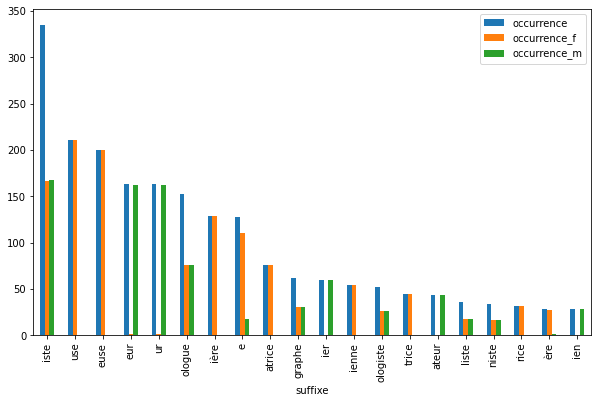

In [ ]:
suffixes.plot.bar(x='suffixe',figsize=(10,6))

We observe that there are only three different types of distribution for suffixes in French:  

- 9 suffixes often found in the feminine gender (`use`, `euse`, `ière`, `e`, `atrice`, `ienne`, `trice`, `rice`, `ère`);  

- 5 suffixes that often indicate male occupational nouns (`eur`, `ur`, `ier`, `ateur`, `ie`)  

- The suffixes are epicene (`iste`, `ologue`, `graphe`), and then the occupations are equally distributed between the two sexes